In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *

# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
%matplotlib inline

In [3]:
path =r'/Users/ckuhn/Documents/DFO_Accuracy/data/' # use your path
allFiles = glob.glob(path + "/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

In [4]:
df = df.drop(['system:index','.geo'], axis=1)

In [5]:
df.head()

,Flood Algorithm,Flood ID,accuracy,fMeasure,fn,fp,precision,recall,tn,tp
0,MODIS,1,0.985255,0.950298,66,34,0.965657,0.935421,5726,956
1,MODIS_Otsu,1,0.970215,0.908098,24,178,0.848639,0.976517,5582,998
0,MODIS,10,0.949827,0.938001,228,4,0.997726,0.885023,2637,1755
1,MODIS_Otsu,10,0.961505,0.953622,153,25,0.986523,0.922844,2616,1830
0,MODIS,11,0.834451,0.653333,17,1439,0.488083,0.987761,5967,1372


In [6]:
df.shape

(28, 10)

In [7]:
stats = pd.melt(df, id_vars=['Flood Algorithm','Flood ID'], var_name='Metric', value_name = 'Score')
stats.head(5)

,Flood Algorithm,Flood ID,Metric,Score
0,MODIS,1,accuracy,0.985255
1,MODIS_Otsu,1,accuracy,0.970215
2,MODIS,10,accuracy,0.949827
3,MODIS_Otsu,10,accuracy,0.961505
4,MODIS,11,accuracy,0.834451


In [8]:
stats.groupby('Metric').describe()

Flood ID                                               Score  \
             count       mean    std  min  25%   50%   75%   max count   
Metric                                                                   
accuracy      28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
fMeasure      28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
fn            28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
fp            28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
precision     28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
recall        28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
tn            28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
tp            28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   

                                                                              \
                   mean           std          min          25%          50%   
Metric                                                                         
accuracy       0.924400      0.102820     0.598183     0.934645     0.969996   
fMeasure       0.734035      0.251704     0.000000     0.631847     0.847514   
fn           488.892857   1228.535483     3.000000    35.000000   104.000000   
fp           315.250000    470.798504     1.000000    31.750000    89.000000   
precision      0.761856      0.277703     0.000000     0.718011     0.852043   
recall         0.783863      0.242540     0.000000     0.696280     0.899964   
tn         11498.178571  14884.324392  1292.000000  3432.000000  5846.500000   
tp          1440.678571   1476.675221     0.000000   851.250000  1332.500000   

                                       
                    75%           max  
Metric                                 
accuracy       0.976639      0.987435  
fMeasure       0.905914      0.953622  
fn           271.500000   6142.000000  
fp           395.750000   1456.000000  
precision      0.962170      0.999099  
recall         0.953139      0.987761  
tn         10069.750000  54125.000000  
tp          1704.000000   7559.000000

In [9]:
precRecall = stats.loc[stats['Metric'].isin(['precision','recall'])]
precRecall['Score']  = precRecall['Score'].multiply(100)
precRecall.groupby('Metric').describe()

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Flood ID                                               Score  \
             count       mean    std  min  25%   50%   75%   max count   
Metric                                                                   
precision     28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
recall        28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   

                                                                       \
                mean        std  min        25%        50%        75%   
Metric                                                                  
precision  76.185619  27.770326  0.0  71.801075  85.204250  96.216999   
recall     78.386309  24.253970  0.0  69.627976  89.996423  95.313862   

                      
                 max  
Metric                
precision  99.909910  
recall     98.776098

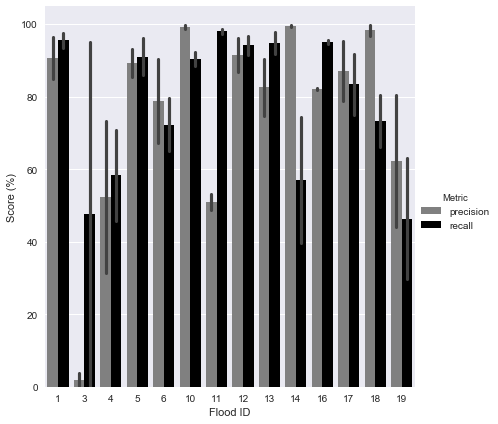

In [10]:
# Draw a nested barplot to show survival for class and sex
flatui = ["grey", "black"]

g = sns.factorplot(x="Flood ID", y="Score", hue="Metric", data=precRecall,
                   size=6, kind="bar", palette= flatui)
g.despine(left=True)
g.set_ylabels("Score (%)")

In [11]:
confusionMatrix = stats.loc[stats['Metric'].isin(['fn','fp',  'tp'])]
confusionMatrix.groupby('Metric').describe()

Flood ID                                               Score  \
          count       mean    std  min  25%   50%   75%   max count   
Metric                                                                
fn         28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
fp         28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   
tp         28.0  10.642857  5.845  1.0  5.0  11.5  16.0  19.0  28.0   

                                                                        
               mean          std  min     25%     50%      75%     max  
Metric                                                                  
fn       488.892857  1228.535483  3.0   35.00   104.0   271.50  6142.0  
fp       315.250000   470.798504  1.0   31.75    89.0   395.75  1456.0  
tp      1440.678571  1476.675221  0.0  851.25  1332.5  1704.00  7559.0

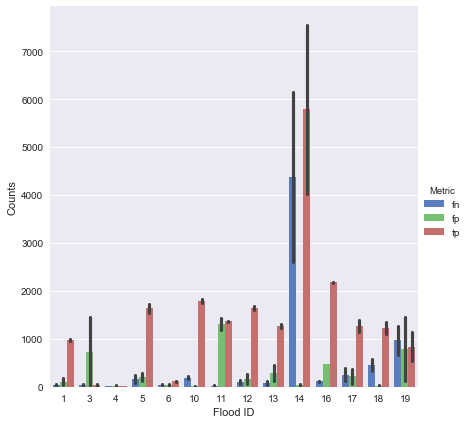

In [12]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Flood ID", y="Score", hue="Metric", data=confusionMatrix,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Counts")

### Factor Plots

https://seaborn.pydata.org/generated/seaborn.factorplot.html

In [13]:
stats = pd.melt(df, id_vars=['Flood Algorithm','Flood ID'], var_name='Metric', value_name = 'Score')
stats.head(1)

,Flood Algorithm,Flood ID,Metric,Score
0,MODIS,1,accuracy,0.985255


In [14]:
stats.shape

(224, 4)

In [15]:
percents = stats.loc[stats['Metric'].isin(['precision','recall', 'accuracy', 'fMeasure'])]

In [16]:
percents.groupby(['Metric', 'Flood Algorithm']).mean()

Flood ID     Score
Metric    Flood Algorithm                     
accuracy  MODIS            10.642857  0.948096
          MODIS_Otsu       10.642857  0.900704
fMeasure  MODIS            10.642857  0.740754
          MODIS_Otsu       10.642857  0.727316
precision MODIS            10.642857  0.774390
          MODIS_Otsu       10.642857  0.749322
recall    MODIS            10.642857  0.755538
          MODIS_Otsu       10.642857  0.812188

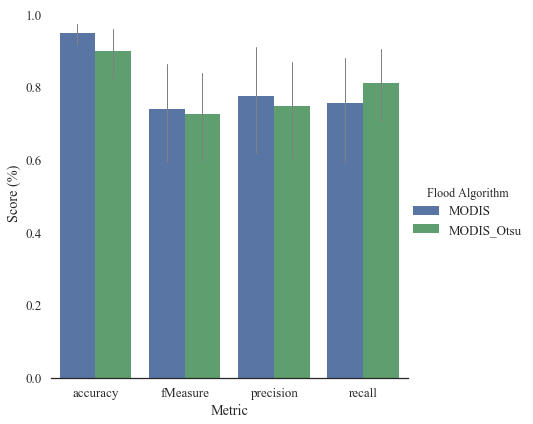

In [17]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

g = sns.factorplot(x="Metric", y="Score", hue="Flood Algorithm", data=percents, size=6, kind="bar", errcolor='grey', errwidth=1)
g.despine(left=True)
g.set_ylabels("Score (%)")

plt.savefig('accuracy_Overall.png', dpi = 600)

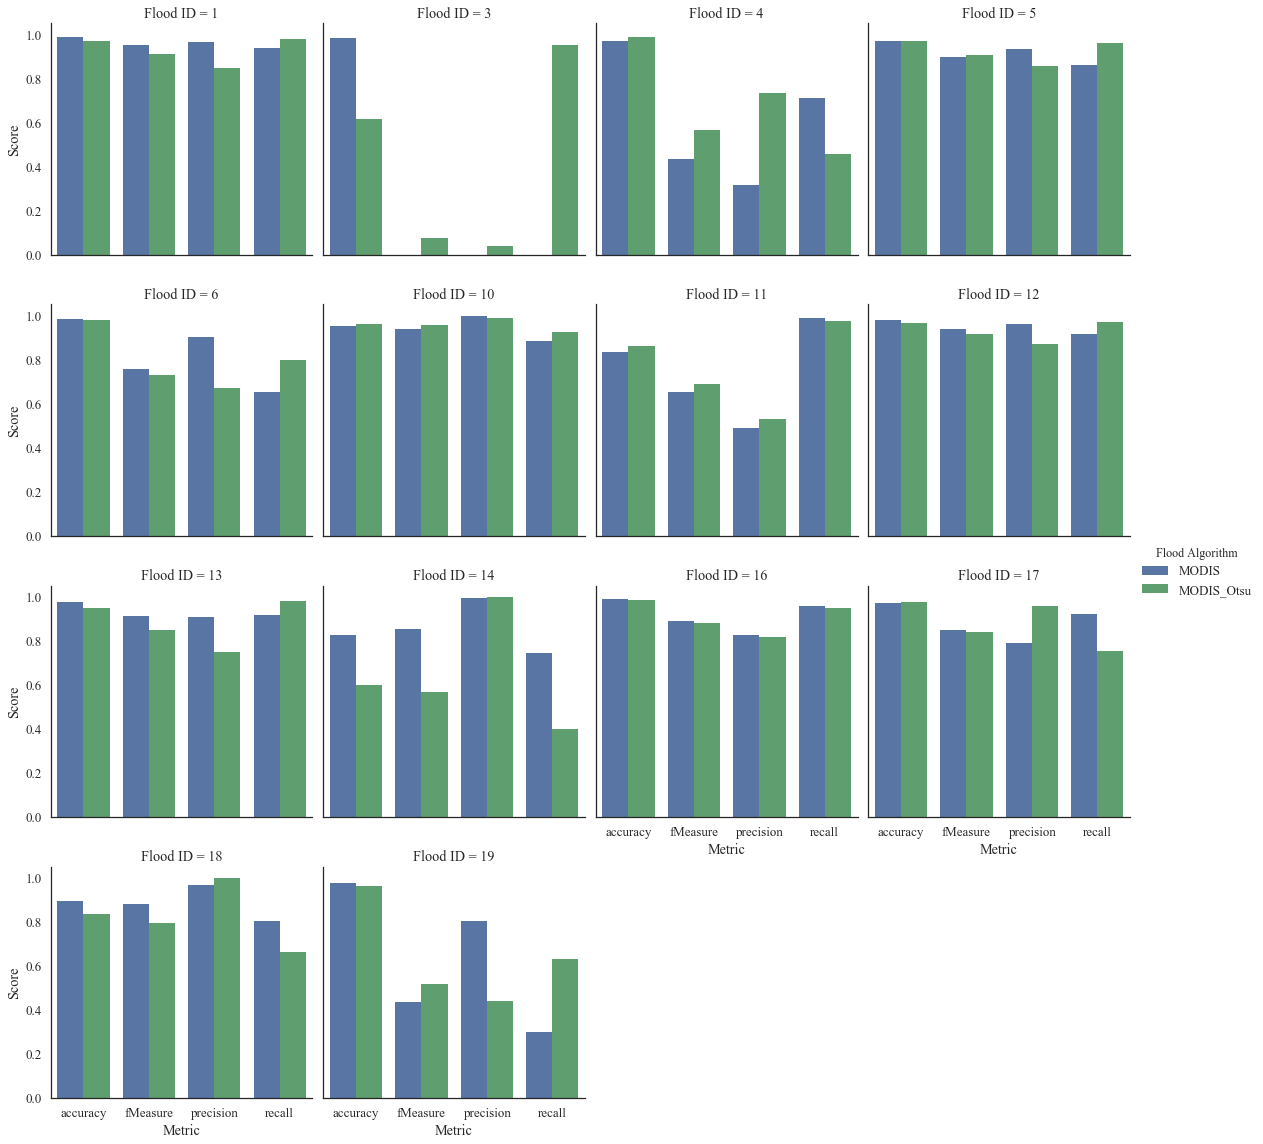

In [18]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

g = sns.factorplot(x="Metric", y="Score", col="Flood ID", col_wrap=4,hue="Flood Algorithm",
                  data=percents[percents.Score.notnull()],
                  kind="bar")


plt.savefig('accuracy_byEvent.png', dpi = 600)

In [19]:
confusionMatrix = stats.loc[stats['Metric'].isin(['fn', 'fp', 'tp'])]
confusionMatrix.groupby(['Metric', 'Flood Algorithm']).mean()

Flood ID        Score
Metric Flood Algorithm                        
fn     MODIS            10.642857   384.714286
       MODIS_Otsu       10.642857   593.071429
fp     MODIS            10.642857   208.428571
       MODIS_Otsu       10.642857   422.071429
tp     MODIS            10.642857  1544.857143
       MODIS_Otsu       10.642857  1336.500000

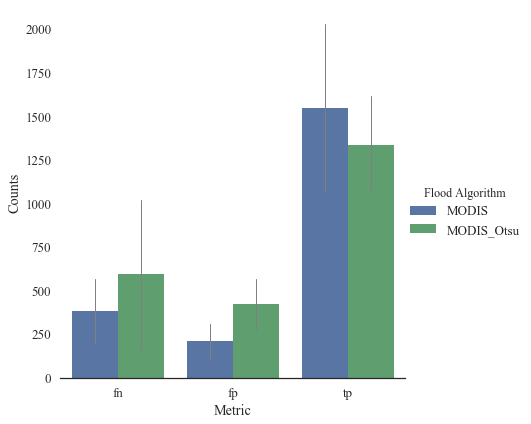

In [20]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   


g = sns.factorplot(x="Metric", y="Score", hue="Flood Algorithm", data=confusionMatrix, size=6, kind="bar", errcolor='grey', errwidth=1, ci=68)
g.despine(left=True)
g.set_ylabels("Counts")

plt.savefig('confusionMatrix_overall.png', dpi = 600)


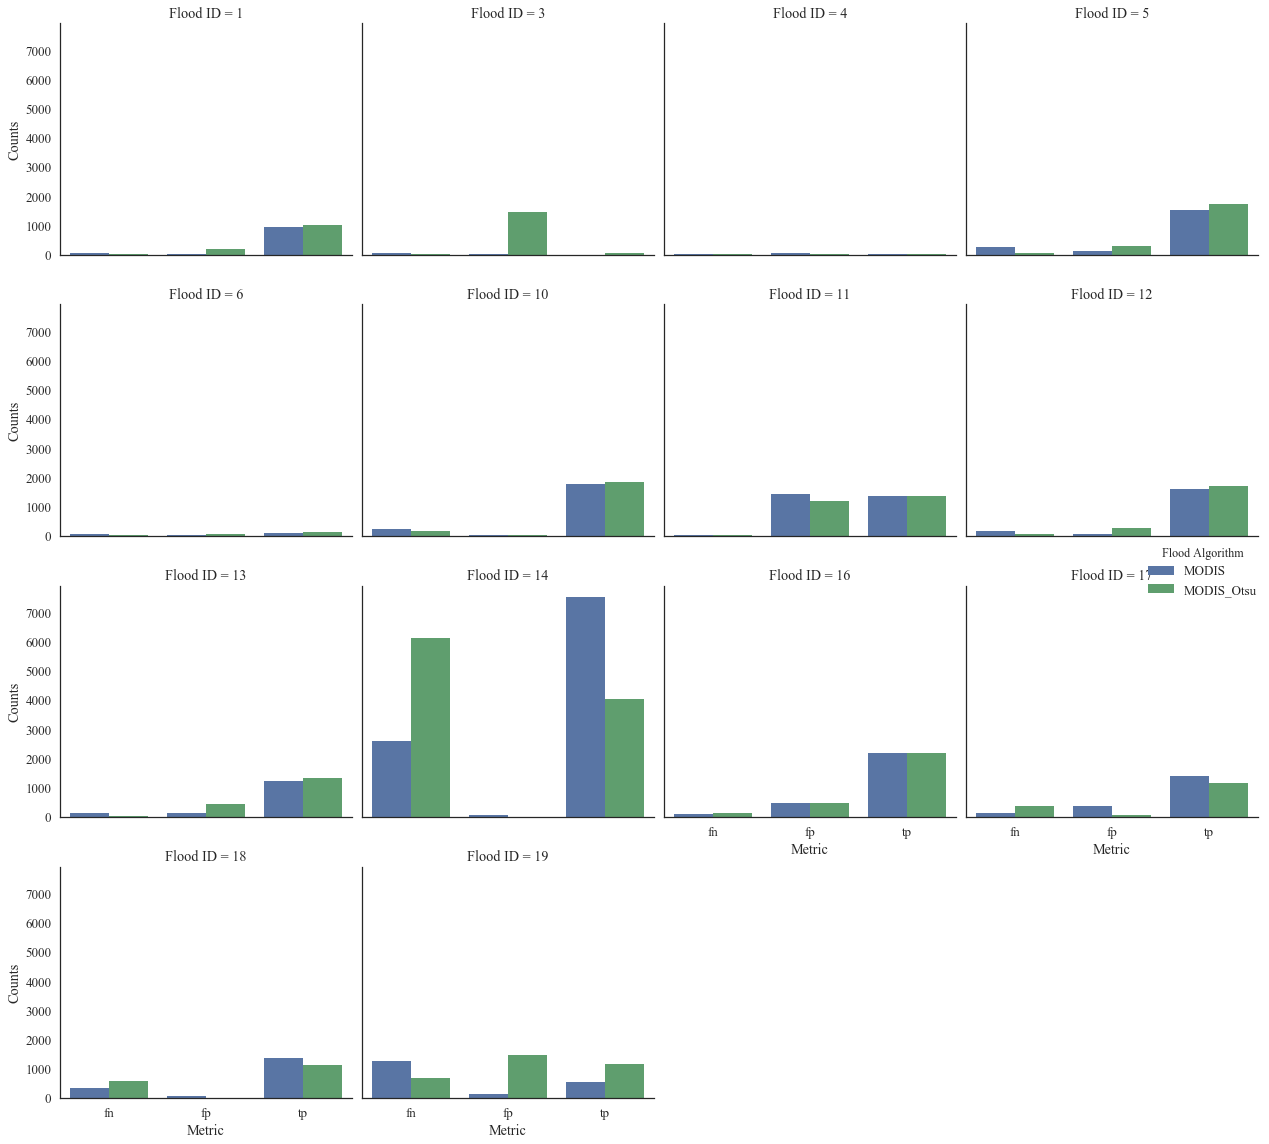

In [21]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   


g = sns.factorplot(x="Metric", y="Score", col="Flood ID", col_wrap=4,hue="Flood Algorithm",
                  data=confusionMatrix[confusionMatrix.Score.notnull()],
                  kind="bar")
g.set_ylabels("Counts")

plt.tight_layout()

plt.savefig('confusionMatrix_byEvent.png', dpi = 600)